# SKIN CANCER - Malignment vs benign

In [3]:
import numpy as np
import pandas as pd
from PIL import Image
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
print(os.listdir('../ANN_from_Scratch/skin-cancer-malignant-vs-benign/data/'))

['test', 'train']


In [8]:
path_to_benign_trainset = "../ANN_from_Scratch/skin-cancer-malignant-vs-benign/data/train/benign/"
path_to_malignment_trainset = "../ANN_from_Scratch/skin-cancer-malignant-vs-benign/data/train/malignant/"

path_to_benign_testset = '../ANN_from_Scratch/skin-cancer-malignant-vs-benign/data/test/benign/'
path_to_malignment_testset = '../ANN_from_Scratch/skin-cancer-malignant-vs-benign/data/test/malignant/'

In [22]:
read_data = lambda x: np.asarray(Image.open(x).convert("RGB"))

#use:
#read_data(os.path.join(path_to_benign_trainset, '3.jpg'))

## Loading Data:


In [25]:
#loading & assigning train set:

train_data_benign = [read_data(os.path.join(path_to_benign_trainset, x)) for x in os.listdir(path_to_benign_trainset)]
train_data_malignment = [read_data(os.path.join(path_to_malignment_trainset, x)) for x in os.listdir(path_to_malignment_trainset)]

X_train_benign = np.array(train_data_benign, dtype='uint8')
X_train_malignment = np.array(train_data_malignment, dtype='uint8')

In [26]:
#loading & assigning test set:

test_data_benign = [read_data(os.path.join(path_to_benign_testset, x)) for x in os.listdir(path_to_benign_testset)]
test_data_malignment = [read_data(os.path.join(path_to_malignment_testset, x)) for x in os.listdir(path_to_malignment_testset)]

X_test_benign = np.array(test_data_benign, dtype="uint8")
X_test_malignment = np.array(test_data_malignment, dtype='uint8')

## Labelling Data:

In [43]:
# Consider as output assignment to orignial data for binary classification: [NOTE: .shape[0] for 1st dimension]
# benign: 0
# malignment: 1

y_train_benign = np.zeros(X_train_benign.shape[0])
y_train_malignment = np.ones(X_train_malignment.shape[0])
print("Train Output Data: \nBenign:",y_train_benign,"\nMalignment:",y_train_malignment)

y_test_benign = np.zeros(X_test_benign.shape[0])
y_test_malignment = np.ones(X_test_malignment.shape[0])
#print("Test Output Data: \n",y_test_benign,"\n",y_test_malignment)

Train Output Data: 
Benign: [0. 0. 0. ... 0. 0. 0.] 
Malignment: [1. 1. 1. ... 1. 1. 1.]


## Merging & Shuffling - Benign & Malignment Dataset:

In [139]:
# Merge
X_train = np.concatenate((X_train_benign, X_train_malignment), axis=0)
y_train = np.concatenate((y_train_benign, y_train_malignment), axis=0)

X_test = np.concatenate((X_test_benign, X_test_malignment), axis=0)
y_test = np.concatenate((y_test_benign, y_test_malignment), axis=0)

In [140]:
# Shuffle

shuf = np.arange(X_train.shape[0])
np.random.shuffle(shuf)
X_train = X_train[shuf]
y_train = y_train[shuf]

shuf = np.arange(X_test.shape[0])
np.random.shuffle(shuf)
X_test = X_test[shuf]
y_test = y_test[shuf]

# Data Visualization:

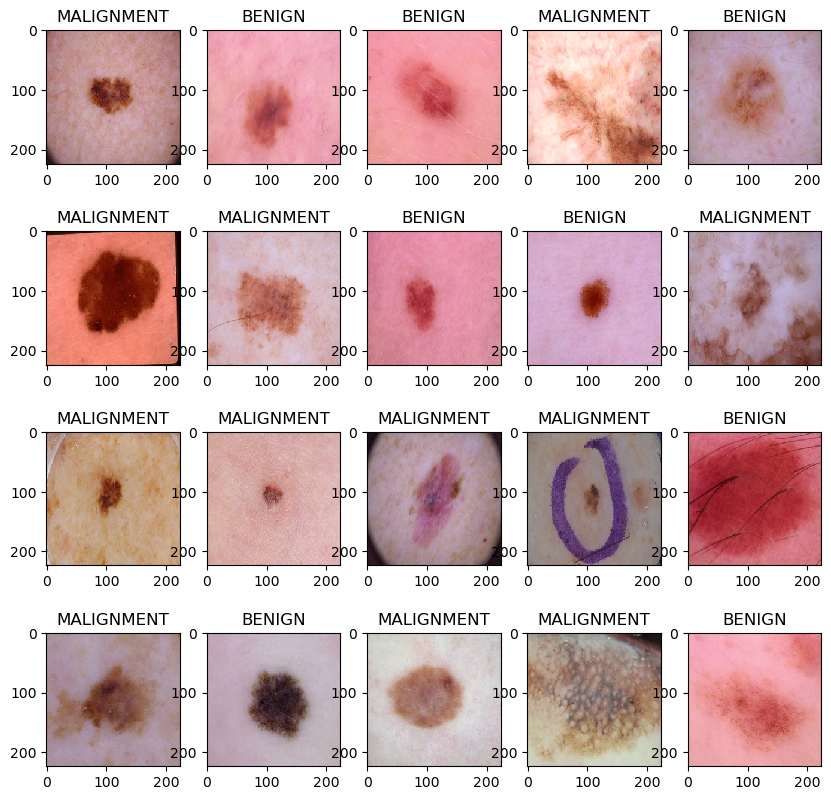

In [58]:
height = 30
width = 40
fig = plt.figure(figsize=(10,10))

rows = 4
cols = 5

for i in range(1, rows*cols+1):
    axis_ = fig.add_subplot(rows, cols, i)
    if y_train[i] == 0:
        axis_.title.set_text("BENIGN")
    else:
        axis_.title.set_text("MALIGNMENT")
    plt.imshow(X_train[i], interpolation='nearest')

plt.show()

# Data Preprocessing:

In [73]:
# X_train[0]

224

In [141]:
# Converting to Scaler Values
X_train = X_train/255
X_test = X_test/255

In [142]:
X_train

array([[[[0.3254902 , 0.16862745, 0.12941176],
         [0.83529412, 0.62745098, 0.56470588],
         [0.83921569, 0.57647059, 0.50196078],
         ...,
         [0.89803922, 0.55686275, 0.47843137],
         [0.90196078, 0.56470588, 0.4745098 ],
         [0.89803922, 0.55294118, 0.4745098 ]],

        [[0.52156863, 0.33333333, 0.27843137],
         [0.85882353, 0.63529412, 0.56862745],
         [0.82352941, 0.56078431, 0.48627451],
         ...,
         [0.90588235, 0.56078431, 0.46666667],
         [0.90196078, 0.55686275, 0.47058824],
         [0.89411765, 0.55294118, 0.4745098 ]],

        [[0.76470588, 0.53333333, 0.47058824],
         [0.85882353, 0.61176471, 0.54509804],
         [0.85490196, 0.59215686, 0.5254902 ],
         ...,
         [0.87843137, 0.53333333, 0.44705882],
         [0.88627451, 0.54901961, 0.45882353],
         [0.87058824, 0.55294118, 0.47058824]],

        ...,

        [[0.83137255, 0.58823529, 0.52941176],
         [0.83529412, 0.58823529, 0.52156863]

In [143]:
# Reshaping to feed as input layer for ANN
input_set = X_train.reshape(X_train.shape[0], -1)
test_set = X_test.reshape(X_test.shape[0], -1)
len(input_set[0])

150528

In [155]:
input_set

array([[0.3254902 , 0.16862745, 0.12941176, ..., 0.74117647, 0.46666667,
        0.42745098],
       [0.85490196, 0.47058824, 0.65490196, ..., 0.80392157, 0.54901961,
        0.63529412],
       [0.10588235, 0.10588235, 0.10588235, ..., 0.09803922, 0.10196078,
        0.12156863],
       ...,
       [0.03921569, 0.        , 0.        , ..., 0.00392157, 0.00784314,
        0.01568627],
       [0.68627451, 0.61176471, 0.69019608, ..., 0.65490196, 0.56862745,
        0.61960784],
       [0.98431373, 0.76078431, 0.81960784, ..., 0.9254902 , 0.70588235,
        0.74117647]])

In [114]:
# Label reshaping:
labels = y_train.reshape(len(y_train), 1)
labels

array([[1.],
       [1.],
       [0.],
       ...,
       [0.],
       [1.],
       [1.]])

---

# ARTIFICIAL NEURAL NETWORKS

- From scratch without importing predefined libraries

### 1. Hyperparameters set-up (learning rate - alpha):

In [79]:
lr = 0.05

### 2. Weights (w) & Bias (b) initialization:

In [86]:
len(input_set[0])

150528

In [102]:
np.random.seed(50)

# Size of weights will be same as that of input values here 150528
weights = np.random.rand(150528, 1)

# Size of bias is constant
bias = np.random.rand(1)


print("\nWeights: ",weights)
print("\nbias: ", bias)
print("\nForward Propagation equation: z = x*w + b",)


Weights:  [[0.49460165]
 [0.2280831 ]
 [0.25547392]
 ...
 [0.01319178]
 [0.33461975]
 [0.14373385]]

bias:  [0.72608901]

Forward Propagation equation: z = x*w + b


### 3. Activation Function Defining:

In [103]:
#Sigmoid - activation function for binary type of classification

def sigmoid(x):
    return 1/(1+np.exp(-1*x))
sigmoid(0)

0.5

### 4. Activation Function Derivation:

In [104]:
def deri_sigmoid(x):
    return sigmoid(x)*(1-sigmoid(x))

### 5. Building Up & Training ANN model:

In [198]:
epochs = 50

**Step:1: Forward Propagation Function: inputs.weights + bias (. for dot product)**

**Step:2: Feeding Forward Function to Activation function (here, sigmoid)**

**Step:3: BackPropagation:**
- **Calculating loss (error) using loss function** (i.e. difference b/w predicted value and original values.
- **Calculating Gradient (rate_of_change)** 
- **Transposing input_sets / weights as:** `Z = W'X + b`

**Step:4: Optimization:**
- **Commonly use Optimizer in ANN: Gradient Descent: <br> `w = w - lr*z` <br> `b = b - lr*z`**

In [216]:
# ANN Model Building:

def ANN_model(input_set, y_train, weights, bias, epochs, learning_rate):
    lr = learning_rate
    labels = y_train
    weights = weights
    bias = bias
    ip = np.around(input_set).astype(int)
    for epoch in range(epochs):
        inputs = ip
        #inputs = input_set
        
        # Summation Function : X*W + b
        XW = np.dot(inputs, weights) + bias
        
        # Activation Function : sigmoid
        z = sigmoid(XW)
        
        # Backpropagation
        #  Loss Function:
        error = (z - labels)
        print("\nEpoch: {}/{} :-------> Loss (ave.) : {}".format(epoch,epochs,error.mean()))
        
        #  Rate of Change calculation:
        deri_cost = error
        deri_pred = deri_sigmoid(z)
        del_z = deri_cost*deri_pred
        
        #  Transposing (any one of weights/inputs)L
        inputs = inputs.T
        
        # Optimization:
        weights = weights - lr*np.dot(inputs, del_z)
        for i in del_z:
            bias = bias - lr*i

    return (weights, bias) 

#### Training Model:


In [217]:
model = ANN_model(input_set, labels, weights, bias, epochs, learning_rate=lr)


Epoch: 0/50 :-------> Loss (ave.) : 0.5460750853242321


C:\Users\91800\AppData\Local\Temp\ipykernel_23728\3806166451.py:4: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-1*x))



Epoch: 1/50 :-------> Loss (ave.) : -0.4539249146757679

Epoch: 2/50 :-------> Loss (ave.) : 0.5460750853242321

Epoch: 3/50 :-------> Loss (ave.) : -0.4539249146757679

Epoch: 4/50 :-------> Loss (ave.) : 0.5460750853242321

Epoch: 5/50 :-------> Loss (ave.) : -0.4539249146757679

Epoch: 6/50 :-------> Loss (ave.) : 0.5460750853242321

Epoch: 7/50 :-------> Loss (ave.) : -0.4539249146757679

Epoch: 8/50 :-------> Loss (ave.) : 0.5460750853242321

Epoch: 9/50 :-------> Loss (ave.) : -0.4539249146757679

Epoch: 10/50 :-------> Loss (ave.) : 0.5460750853242321

Epoch: 11/50 :-------> Loss (ave.) : -0.4539249146757679

Epoch: 12/50 :-------> Loss (ave.) : 0.5460750853242321

Epoch: 13/50 :-------> Loss (ave.) : -0.4539249146757679

Epoch: 14/50 :-------> Loss (ave.) : 0.5460750853242321

Epoch: 15/50 :-------> Loss (ave.) : -0.4539249146757679

Epoch: 16/50 :-------> Loss (ave.) : 0.5460750853242321

Epoch: 17/50 :-------> Loss (ave.) : -0.4539249146757679

Epoch: 18/50 :-------> Loss (a

In [ ]:
model

### 6. Prediction

In [ ]:
sigmoid(np.dot(test_set[0], model[0]) + model[1])

In [ ]:
y_test[0]

In [ ]:
# Rough Prediction function:

def ANN_model_predict(inp_single, model):
    w,b = model
    return 1 if 0.5<(sigmoid(np.dot(inp_single, w) + b)) else 0

In [ ]:
y_pred = []
for test_data in test_set:
    y_pred.append(ANN_model_predict(test_data, model))

y_pred

---

## Still figuring out regarding management of complex datasets like Skin cancer.

### Work In Progress... 🔨

- **Changes to be implemented:**
- Activation function to be changed.
- Optimization function to be changed.
- Also, working with large image datasets, hence have to flatten the Image data.

---